# *TASK-4*
*Decision Tree Classifier and it's Graphical Visualization*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import numpy as np
import seaborn as sbn
%matplotlib inline

In [2]:
sbn.set_style("whitegrid")

In [3]:
df = pd.read_csv("iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df = df.drop("Id", axis = 1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


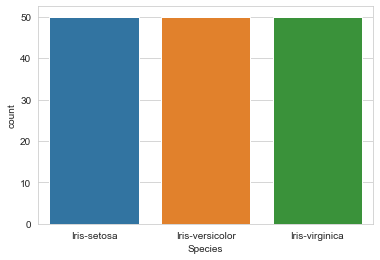

In [7]:
sbn.countplot("Species", data = df)

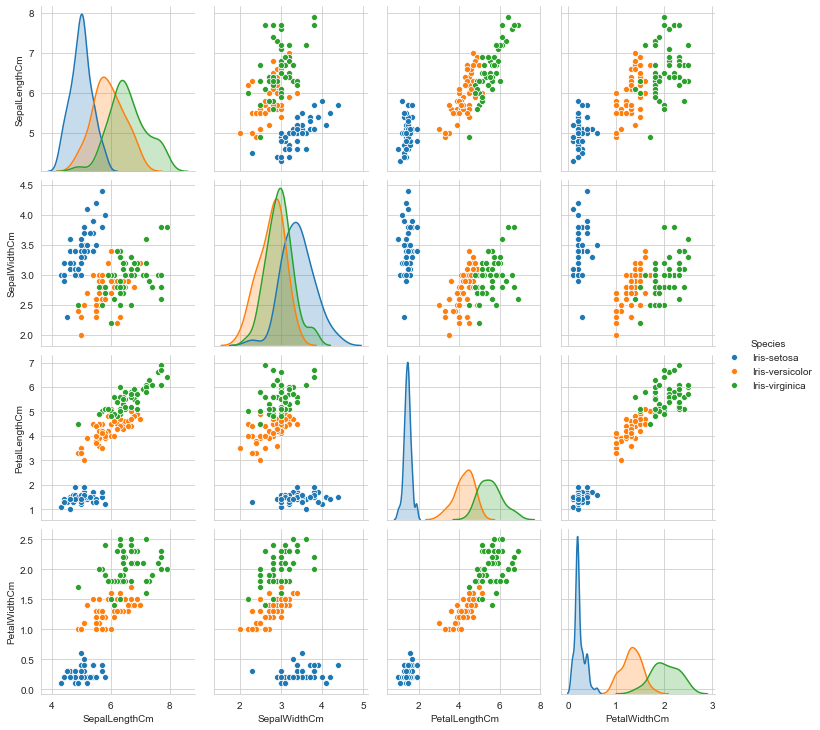

In [8]:
sbn.pairplot(df, hue = "Species")
plt.show()

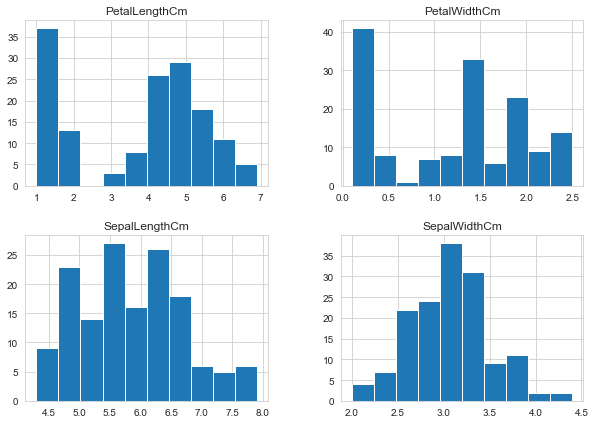

In [9]:
df.hist(figsize = (10,7))
plt.show()

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

In [11]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [13]:
from sklearn.tree import DecisionTreeClassifier
DTree = DecisionTreeClassifier()
DTree.fit(X_train, y_train)
y_pred = DTree.predict(X_test)
print("Decision Tree Classifier created !")

Decision Tree Classifier created !


In [14]:
print(DTree)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [15]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [16]:
print(confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [17]:
from sklearn.metrics import accuracy_score
print("accuracy is", accuracy_score(y_pred,y_test))

accuracy is 1.0


#### **WE GOT MAXIMUM ACCURACY**

In [18]:
from sklearn.tree import plot_tree

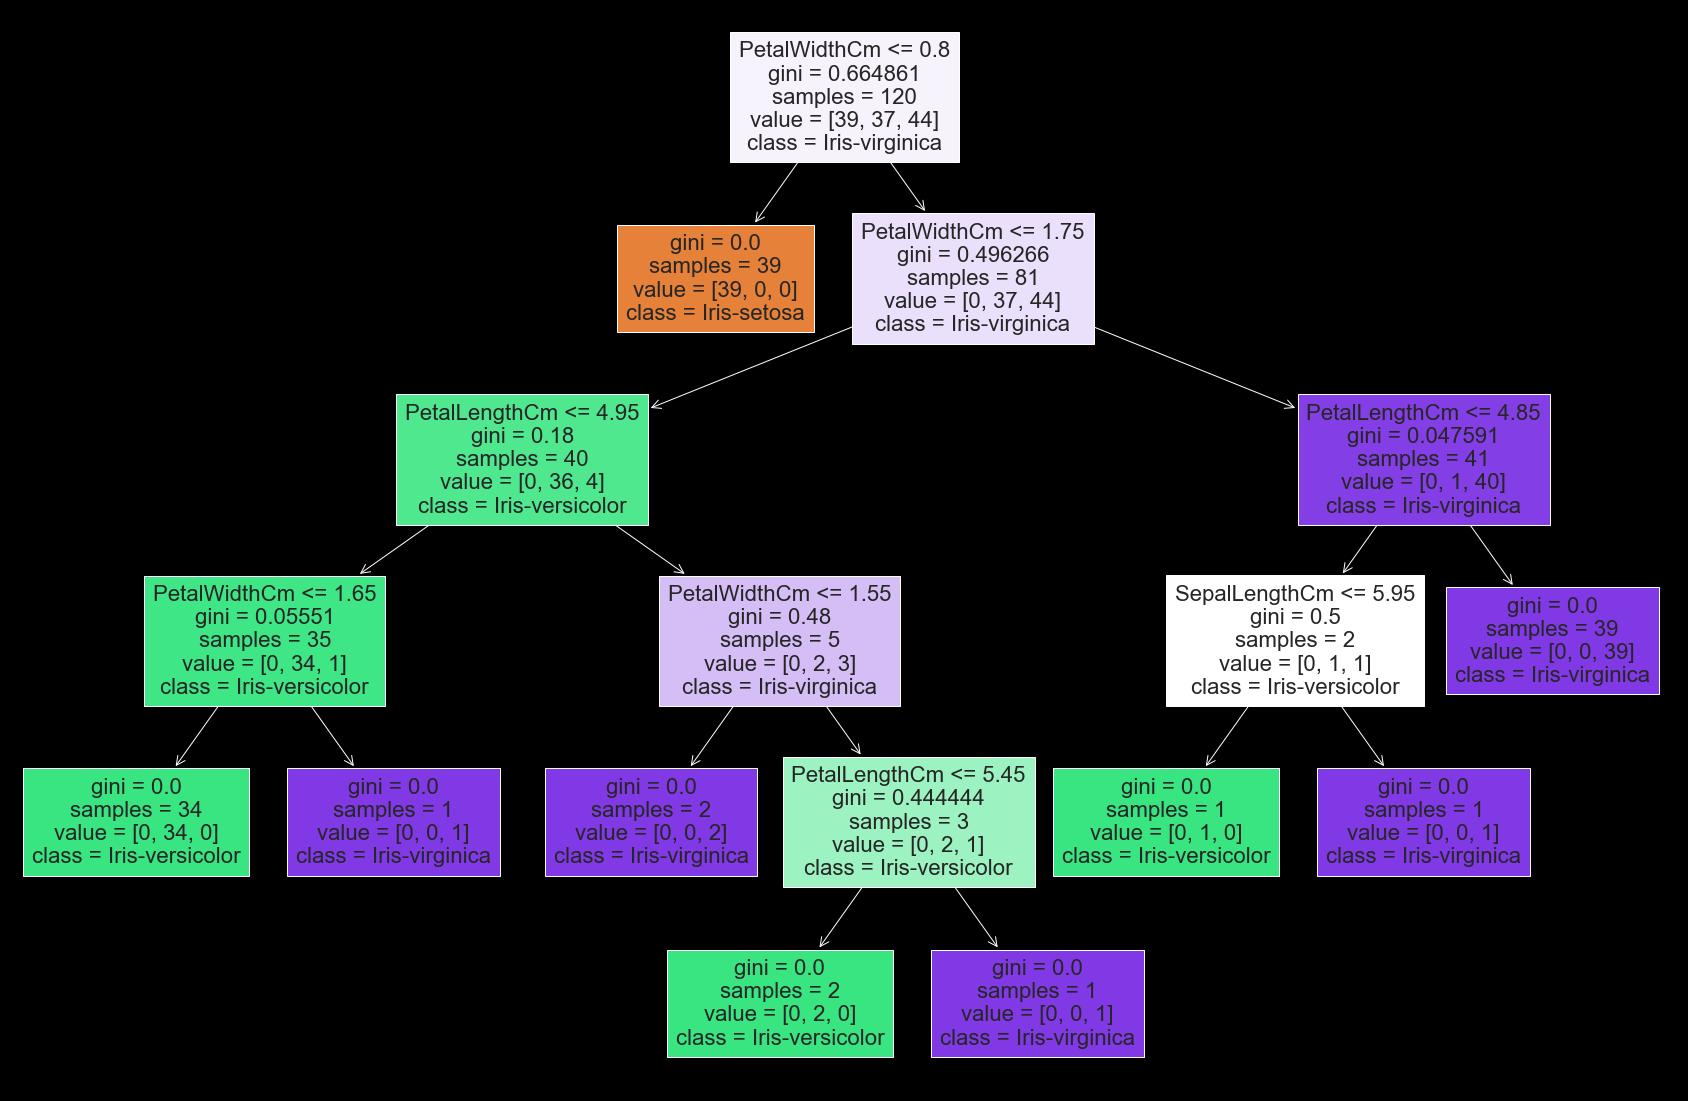

In [19]:
fig, ax = plt.subplots(figsize = (30, 20), facecolor = "k")
plot_tree(DTree,feature_names = df.columns, class_names = df["Species"].unique().tolist(),
          precision = 6, label = "all", filled = True)
plt.show()